<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Cleaning-wave-1-data" data-toc-modified-id="Cleaning-wave-1-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cleaning wave 1 data</a></span></li><li><span><a href="#Cleaning-wave-2-data" data-toc-modified-id="Cleaning-wave-2-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cleaning wave 2 data</a></span></li><li><span><a href="#Cleaning-Wave-3-data" data-toc-modified-id="Cleaning-Wave-3-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cleaning Wave 3 data</a></span></li><li><span><a href="#Cleaning-wave-4-data" data-toc-modified-id="Cleaning-wave-4-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Cleaning wave 4 data</a></span></li><li><span><a href="#Merging-4-waves-on-pid" data-toc-modified-id="Merging-4-waves-on-pid-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Merging 4 waves on pid</a></span></li><li><span><a href="#Insights" data-toc-modified-id="Insights-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Insights</a></span><ul class="toc-item"><li><span><a href="#Insights-across-all-waves" data-toc-modified-id="Insights-across-all-waves-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Insights across all waves</a></span></li><li><span><a href="#Income-frequency" data-toc-modified-id="Income-frequency-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Income frequency</a></span><ul class="toc-item"><li><span><a href="#Income-frequency-April" data-toc-modified-id="Income-frequency-April-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Income frequency April</a></span></li><li><span><a href="#Income-frequency-June" data-toc-modified-id="Income-frequency-June-7.2.2"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span>Income frequency June</a></span></li><li><span><a href="#Income-frequency-October" data-toc-modified-id="Income-frequency-October-7.2.3"><span class="toc-item-num">7.2.3&nbsp;&nbsp;</span>Income frequency October</a></span></li><li><span><a href="#Income-frequency-January" data-toc-modified-id="Income-frequency-January-7.2.4"><span class="toc-item-num">7.2.4&nbsp;&nbsp;</span>Income frequency January</a></span></li><li><span><a href="#Distribution-of-monthly-pay-in-April" data-toc-modified-id="Distribution-of-monthly-pay-in-April-7.2.5"><span class="toc-item-num">7.2.5&nbsp;&nbsp;</span>Distribution of monthly pay in April</a></span></li></ul></li><li><span><a href="#Mean-and-median-income-across-the-waves" data-toc-modified-id="Mean-and-median-income-across-the-waves-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Mean and median income across the waves</a></span><ul class="toc-item"><li><span><a href="#Monthly-income" data-toc-modified-id="Monthly-income-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Monthly income</a></span></li><li><span><a href="#Daily-income" data-toc-modified-id="Daily-income-7.3.2"><span class="toc-item-num">7.3.2&nbsp;&nbsp;</span>Daily income</a></span></li><li><span><a href="#Weekly-income" data-toc-modified-id="Weekly-income-7.3.3"><span class="toc-item-num">7.3.3&nbsp;&nbsp;</span>Weekly income</a></span></li><li><span><a href="#2-weekly-income" data-toc-modified-id="2-weekly-income-7.3.4"><span class="toc-item-num">7.3.4&nbsp;&nbsp;</span>2-weekly income</a></span></li></ul></li><li><span><a href="#Net-monthly-income-gain---April-2020-to-January-2021" data-toc-modified-id="Net-monthly-income-gain---April-2020-to-January-2021-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Net monthly income gain - April 2020 to January 2021</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import bamboolib as bam

%matplotlib inline

## Introduction ##

This notebook explores data regarding households and livelihoods and the impact of the coronavirus. NIDS (National Income Dynamics Study) is a nationally (South African) representative panel survey following the trajectories of people over a period of time. At the height of the coronavirus, the database was purposed to collect particular information about the impact of the coronavirus (CRAM - Coronavirus Rapid Mobile Survey.) In particular I have used the data to understand income earned by youth, with a view to understanding how youth earnings may have been impacted by South Africa's lockdown responses to the virus.

## Cleaning wave 1 data ##

In [2]:
import pyreadstat
dtafile='Wave1.dta'
df_wave1, meta = pyreadstat.read_dta(dtafile)
# Step: Rename multiple column(s)
df_wave1 = df_wave1.rename(columns={'w1_nc_dob_y': 'born'})

# Step: Rearranged the order of the columns
old_columns = [x for x in df_wave1.columns if x not in ['born']]
insert_index = old_columns.index('pid') + 1
df_wave1 = df_wave1[old_columns[:insert_index] + ['born'] + old_columns[insert_index:]]

df_wave1["age"] = 2020 - df_wave1['born']
df_wave1["age"] = pd.to_numeric(df_wave1["age"], downcast='integer', errors='coerce')

# Step: Rearranged the order of the columns
old_columns = [x for x in df_wave1.columns if x not in ['age']]
insert_index = old_columns.index('pid') + 1
df_wave1 = df_wave1[old_columns[:insert_index] + ['age'] + old_columns[insert_index:]]

# Step: Change data type of age to Integer
df_wave1['age'] = df_wave1['age'].astype('Int64')


There are 2,786 records for youth between 18 and 35

In [3]:
# Step: Keep rows where (age and (age >= 18)
df_wave1 = df_wave1.loc[(df_wave1['age'] <= 34) & (df_wave1['age'] >= 18)]

# Step: Rename multiple column(s)
df_wave1 = df_wave1.rename(columns={'w1_nc_eminc_feb': 'feb_m_pay'})

# Step: Rename multiple column(s)
df_wave1 = df_wave1.rename(columns={'w1_nc_eminc_feb_brac': 'feb_m_pay_brac'})

# Step: Rearranged the order of the columns
old_columns = [x for x in df_wave1.columns if x not in ['feb_m_pay', 'feb_m_pay_brac']]
insert_index = old_columns.index('age') + 1
df_wave1 = df_wave1[old_columns[:insert_index] + ['feb_m_pay', 'feb_m_pay_brac'] + old_columns[insert_index:]]

# Step: Rename multiple column(s)
df_wave1 = df_wave1.rename(columns={'w1_nc_emdayinc_apr': 'apr_day_pay'})

# Step: Rename multiple column(s)
df_wave1 = df_wave1.rename(columns={'w1_nc_emwkinc_apr': 'apr_wk_pay'})

# Step: Rename multiple column(s)
df_wave1 = df_wave1.rename(columns={'w1_nc_emwkinc_apr_brac': 'apr_wk_pay_brac'})

# Step: Rename multiple column(s)
df_wave1 = df_wave1.rename(columns={'w1_nc_em2wksinc_apr': 'apr_2wk_pay'})

# Step: Rename multiple column(s)
df_wave1 = df_wave1.rename(columns={'w1_nc_em2wksinc_apr_brac': 'apr_2wk_pay_brac'})

# Step: Rename multiple column(s)
df_wave1 = df_wave1.rename(columns={'w1_nc_eminc_apr': 'apr_mnth_pay'})

# Step: Rename multiple column(s)
df_wave1 = df_wave1.rename(columns={'w1_nc_eminc_apr_brac': 'apr_mnth_pay_brac'})

# Step: Rearranged the order of the columns
old_columns = [x for x in df_wave1.columns if x not in ['apr_day_pay', 'apr_wk_pay', 'apr_wk_pay_brac', 'apr_2wk_pay', 'apr_2wk_pay_brac', 'apr_mnth_pay', 'apr_mnth_pay_brac']]
insert_index = old_columns.index('feb_m_pay_brac') + 1
df_wave1 = df_wave1[old_columns[:insert_index] + ['apr_day_pay', 'apr_wk_pay', 'apr_wk_pay_brac', 'apr_2wk_pay', 'apr_2wk_pay_brac', 'apr_mnth_pay', 'apr_mnth_pay_brac'] + old_columns[insert_index:]]

# Step: Select columns
df_wave11 = df_wave1[['pid', 'age', 'feb_m_pay', 'feb_m_pay_brac', 'apr_day_pay', 'apr_wk_pay', 'apr_wk_pay_brac', 'apr_2wk_pay', 'apr_2wk_pay_brac', 'apr_mnth_pay', 'apr_mnth_pay_brac']]

df_wave11 = df_wave11.replace(-9, np.nan)
df_wave11 = df_wave11.replace(-8, np.nan)
df_wave11 = df_wave11.replace(-7, np.nan)
df_wave11 = df_wave11.replace(-6, np.nan)
df_wave11 = df_wave11.replace(-5, np.nan)

# Step: Change data type of feb_m_pay to Integer
df_wave11['feb_m_pay'] = df_wave11['feb_m_pay'].astype('Int64')

# Step: Change data type of apr_day_pay to Integer
df_wave11['apr_day_pay'] = df_wave11['apr_day_pay'].astype('Int64')

# Step: Change data type of apr_wk_pay to Integer
df_wave11['apr_wk_pay'] = df_wave11['apr_wk_pay'].astype('Int64')

# Step: Change data type of apr_2wk_pay to Integer
df_wave11['apr_2wk_pay'] = df_wave11['apr_2wk_pay'].astype('Int64')

# Step: Change data type of apr_mnth_pay to Integer

df_wave11['feb_m_pay'] = df_wave11['feb_m_pay'].replace('-9', np.nan)
df_wave11['feb_m_pay'] = df_wave11['feb_m_pay'].replace('-8', np.nan)
# Step: Change data type of feb_m_pay to Integer
df_wave11['feb_m_pay'] = df_wave11['feb_m_pay'].astype('Int64')

# Step: Set values of feb_m_pay to missing value where feb_m_pay < 0
df_wave11.loc[df_wave11['feb_m_pay'] < 0, 'feb_m_pay'] = np.nan


df_wave11['feb_m_pay_brac'] = pd.to_numeric(df_wave11['feb_m_pay_brac'], downcast='integer', errors='coerce')
df_wave11['feb_m_pay_brac'] =df_wave11['feb_m_pay_brac'].replace([1, 2, 3, 4, 5, 6], ['0','<R3,000', 'R3,001-R6,000', 'R6,001-R12,000','R12,001-R24,000', '>R24,000'])

df_wave11['apr_wk_pay_brac'] = pd.to_numeric(df_wave11['apr_wk_pay_brac'], downcast='integer', errors='coerce')
df_wave11['apr_wk_pay_brac'] =df_wave11['apr_wk_pay_brac'].replace([1, 2, 3, 4, 5, 6], ['0','<R700', 'R701-R1,400', 'R1,401-R2,800','R2,801-R5,500', '>R5,500'])

df_wave11['apr_2wk_pay_brac'] = pd.to_numeric(df_wave11['apr_2wk_pay_brac'], downcast='integer', errors='coerce')
df_wave11['apr_2wk_pay_brac'] =df_wave11['apr_2wk_pay_brac'].replace([2, 3, 4], ['<R1,400', 'R1,401-R2,800','R2,801-R5,500'])

# Step: Change data type of apr_mnth_pay to Integer
df_wave11['apr_mnth_pay'] = df_wave11['apr_mnth_pay'].astype('Int64')

df_wave11['apr_mnth_pay_brac'] = pd.to_numeric(df_wave11['apr_mnth_pay_brac'], downcast='integer', errors='coerce')
df_wave11['apr_mnth_pay_brac'] =df_wave11['apr_mnth_pay_brac'].replace([1, 2, 3, 4, 5, 6], ['0','<R3,000', 'R3,001-R6,000', 'R6,001-R12,000','R12,001-R24,000', '>R24,000'])


df_wave11

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/missing.py:49: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



,pid,age,feb_m_pay,feb_m_pay_brac,apr_day_pay,apr_wk_pay,apr_wk_pay_brac,apr_2wk_pay,apr_2wk_pay_brac,apr_mnth_pay,apr_mnth_pay_brac
2,301059,30,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
5,301070,34,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
9,301082,31,8000,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
16,301113,28,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
23,301191,32,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7063,799485,23,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
7065,799572,31,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
7068,799697,22,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
7069,799780,24,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN


## Cleaning wave 2 data ##

In [4]:
import pyreadstat
dtafile='Wave2.dta'
df_wave2, meta = pyreadstat.read_dta(dtafile)

In [5]:
wave_2=df_wave2

# Working with age

# Step: Rename multiple column(s)
wave_2 = wave_2.rename(columns={'w2_nc_dob_y': 'born'})

# Step: Change data type of born to Integer
wave_2['born'] = wave_2['born'].astype('Int64')

# Calculate age
wave_2["age"] = 2020 - wave_2['born']
wave_2["age"] = pd.to_numeric(wave_2["age"], downcast='integer', errors='coerce')

# Step: Rearranged the order of the columns
old_columns = [x for x in wave_2.columns if x not in ['age']]
insert_index = old_columns.index('pid') + 1
wave_2 = wave_2[old_columns[:insert_index] + ['age'] + old_columns[insert_index:]]


There are 2,223 participants aged 18-34

In [6]:
# Step: Keep rows where (age >= 18) and (age <= 34)
wave_2 = wave_2.loc[(wave_2['age'] >= 18) & (wave_2['age'] <= 34)]
# Step: Rearranged the order of the columns
old_columns = [x for x in wave_2.columns if x not in ['w2_nc_empay_freq']]
insert_index = old_columns.index('age') + 1
wave_2 = wave_2[old_columns[:insert_index] + ['w2_nc_empay_freq'] + old_columns[insert_index:]]

# Step: Rename multiple column(s)
wave_2 = wave_2.rename(columns={'w2_nc_empay_freq': 'pay_freq'})

# Step: Rearranged the order of the columns
old_columns = [x for x in wave_2.columns if x not in ['w2_nc_emdayinc_june']]
insert_index = old_columns.index('pay_freq') + 1
wave_2 = wave_2[old_columns[:insert_index] + ['w2_nc_emdayinc_june'] + old_columns[insert_index:]]

# Step: Rename multiple column(s)
wave_2 = wave_2.rename(columns={'w2_nc_emdayinc_june': 'june_daily_pay'})

# Step: Rearranged the order of the columns
old_columns = [x for x in wave_2.columns if x not in ['w2_nc_emwkinc_june', 'w2_nc_emwkinc_june_brac']]
insert_index = old_columns.index('june_daily_pay') + 1
wave_2 = wave_2[old_columns[:insert_index] + ['w2_nc_emwkinc_june', 'w2_nc_emwkinc_june_brac'] + old_columns[insert_index:]]

# Step: Rename multiple column(s)
wave_2 = wave_2.rename(columns={'w2_nc_emwkinc_june': 'june_week_pay'})

# Step: Rename multiple column(s)
wave_2 = wave_2.rename(columns={'w2_nc_emwkinc_june_brac': 'june_week_pay_brac'})

# Step: Rearranged the order of the columns
old_columns = [x for x in wave_2.columns if x not in ['w2_nc_em2wksinc_june', 'w2_nc_em2wksinc_june_brac']]
insert_index = old_columns.index('june_week_pay_brac') + 1
wave_2 = wave_2[old_columns[:insert_index] + ['w2_nc_em2wksinc_june', 'w2_nc_em2wksinc_june_brac'] + old_columns[insert_index:]]

# Step: Rename multiple column(s)
wave_2 = wave_2.rename(columns={'w2_nc_em2wksinc_june': 'june_2wk_pay'})

# Step: Rename multiple column(s)
wave_2 = wave_2.rename(columns={'w2_nc_em2wksinc_june_brac': 'june_2wk_pay_brac'})

# Step: Rearranged the order of the columns
old_columns = [x for x in wave_2.columns if x not in ['w2_nc_eminc_june', 'w2_nc_eminc_june_brac']]
insert_index = old_columns.index('june_2wk_pay_brac') + 1
wave_2 = wave_2[old_columns[:insert_index] + ['w2_nc_eminc_june', 'w2_nc_eminc_june_brac'] + old_columns[insert_index:]]

# Step: Rename multiple column(s)
wave_2 = wave_2.rename(columns={'w2_nc_eminc_june': 'june_mnth_pay'})

# Step: Rename multiple column(s)
wave_2 = wave_2.rename(columns={'w2_nc_eminc_june_brac': 'june_mnth_pay_brac'})

# Step: Change data type of pay_freq to Integer
wave_2['pay_freq'] = wave_2['pay_freq'].astype('Int64')

# Step: Select columns
wave_21 = wave_2[['pid', 'age', 'pay_freq', 'june_daily_pay', 'june_week_pay', 'june_week_pay_brac', 'june_2wk_pay', 'june_2wk_pay_brac', 'june_mnth_pay', 'june_mnth_pay_brac']]

# Step: Change data type of june_daily_pay to Integer
wave_21['june_daily_pay'] = wave_21['june_daily_pay'].astype('Int64')

wave_21['june_daily_pay'] = pd.to_numeric(wave_21['june_daily_pay'], downcast='integer', errors='coerce')

wave_21 = wave_21.replace(-9, np.nan)
wave_21 = wave_21.replace(-8, np.nan)
wave_21 = wave_21.replace(-7, np.nan)
wave_21 = wave_21.replace(-6, np.nan)
wave_21 = wave_21.replace(-5, np.nan)


In [7]:
# Step: Change data type of june_daily_pay to String/Text
wave_21['june_daily_pay'] = wave_21['june_daily_pay'].astype('string')

# Step: Set values of june_daily_pay to missing value where june_daily_pay is one of: -9
wave_21.loc[wave_21['june_daily_pay'].isin(['-9']), 'june_daily_pay'] = np.nan

# Step: Change data type of june_daily_pay to Integer
wave_21['june_daily_pay'] = wave_21['june_daily_pay'].astype('Int64')

# Step: Change data type of june_week_pay to Integer
wave_21['june_week_pay'] = wave_21['june_week_pay'].astype('Int64')

# Step: Sort column(s) june_week_pay_brac descending (Z-A)
wave_21 = wave_21.sort_values(by=['june_week_pay_brac'], ascending=[False])

# Step: Change data type of ['june_week_pay_brac', 'june_2wk_pay_brac', 'june_mnth_pay_brac'] to Integer
for column_name in ['june_week_pay_brac', 'june_2wk_pay_brac', 'june_mnth_pay_brac']:
    wave_21[column_name] = wave_21[column_name].astype('Int64')


In [8]:
wave_21['june_week_pay_brac'] = wave_21['june_week_pay_brac'].replace([1, 2, 3, 4, 5, 6], ['0','<R700', 'R701-R1,400', 'R1,401-R2,800','R2,801-R5,500', '>R5,500'])
# Step: Sort column(s) june_week_pay_brac descending (Z-A)
wave_21 = wave_21.sort_values(by=['june_week_pay_brac'], ascending=[False])


In [9]:
wave_21['june_2wk_pay_brac'] =wave_21['june_2wk_pay_brac'].replace([1, 2, 3, 4, 5, 6], ['0,','<R1,400', 'R1,401-R2,800','R2,801-R5,500','R5,501-R11,000','>R11,000'])
# Step: Sort column(s) june_2wk_pay_brac descending (Z-A)
wave_21 = wave_21.sort_values(by=['june_2wk_pay_brac'], ascending=[False])

# Step: Sort column(s) june_mnth_pay_brac descending (Z-A)
wave_21 = wave_21.sort_values(by=['june_mnth_pay_brac'], ascending=[False])


In [10]:
wave_21['june_mnth_pay_brac'] =wave_21['june_mnth_pay_brac'].replace([1, 2, 3, 4, 5, 6], ['0','<R3,000', 'R3,001-R6,000', 'R6,001-R12,000','R12,001-R24,000', '>R24,000'])
# Step: Sort column(s) june_mnth_pay_brac descending (Z-A)
wave_21 = wave_21.sort_values(by=['june_mnth_pay_brac'], ascending=[False])

wave_21

,pid,age,pay_freq,june_daily_pay,june_week_pay,june_week_pay_brac,june_2wk_pay,june_2wk_pay_brac,june_mnth_pay,june_mnth_pay_brac
3005,321304,34,4,<NA>,<NA>,<NA>,NaN,<NA>,NaN,"R6,001-R12,000"
4150,409980,26,4,<NA>,<NA>,<NA>,NaN,<NA>,NaN,"R6,001-R12,000"
1933,312789,29,4,<NA>,<NA>,<NA>,NaN,<NA>,NaN,"R6,001-R12,000"
552,303920,32,4,<NA>,<NA>,<NA>,NaN,<NA>,NaN,"R6,001-R12,000"
2136,314084,32,4,<NA>,<NA>,<NA>,NaN,<NA>,NaN,"R6,001-R12,000"
...,...,...,...,...,...,...,...,...,...,...
7031,798615,22,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN
7043,799572,30,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN
7046,799697,22,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN
7047,799780,24,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN


## Cleaning Wave 3 data ##

In [11]:
dtafile='Wave3.dta'
df_wave3, meta = pyreadstat.read_dta(dtafile)

In [12]:
# Calculating age

In [13]:
wave3=df_wave3
# Step: Rename multiple column(s)
df_wave3 = df_wave3.rename(columns={'w3_nc_dob_y': 'born'})

# Step: Rearranged the order of the columns
old_columns = [x for x in df_wave3.columns if x not in ['born']]
insert_index = old_columns.index('pid') + 1
wave3 = df_wave3[old_columns[:insert_index] + ['born'] + old_columns[insert_index:]]

# Step: Change data type of born to Integer
wave3['born'] = wave3['born'].astype('Int64')

wave3["age"] = 2020 - wave3['born']
wave3["age"] = pd.to_numeric(wave3["age"], downcast='integer', errors='coerce')
# Step: Rearranged the order of the columns
old_columns = [x for x in wave3.columns if x not in ['age']]
insert_index = old_columns.index('born') + 1
wave3 = wave3[old_columns[:insert_index] + ['age'] + old_columns[insert_index:]]


In [14]:
# Sort for ages 18-34

There are 2,534 youth aged 18 to 34 in wave 3

In [15]:
# Step: Keep rows where (age and (age >= 18)
wave3 = wave3.loc[(wave3['age'] <= 34) & (wave3['age'] >= 18)]

In [16]:
# Replacing negative numbers

In [17]:
wave3 = wave3.replace(-9, np.nan)
wave3 = wave3.replace(-8, np.nan)
wave3 = wave3.replace(-7, np.nan)
wave3 = wave3.replace(-6, np.nan)
wave3 = wave3.replace(-5, np.nan)

In [18]:
# Renaming and moving columns dealing with income

In [19]:
# Step: Rename multiple column(s)
wave3 = wave3.rename(columns={'w3_nc_emdayinc_oct': 'oct_daily_pay'})

# Step: Rearranged the order of the columns
old_columns = [x for x in wave3.columns if x not in ['oct_daily_pay']]
insert_index = old_columns.index('age') + 1
wave3 = wave3[old_columns[:insert_index] + ['oct_daily_pay'] + old_columns[insert_index:]]

# Step: Rename multiple column(s)
wave3 = wave3.rename(columns={'w3_nc_emwkinc_oct': 'oct_wk_pay'})

# Step: Rearranged the order of the columns
old_columns = [x for x in wave3.columns if x not in ['oct_wk_pay']]
insert_index = old_columns.index('oct_daily_pay') + 1
wave3 = wave3[old_columns[:insert_index] + ['oct_wk_pay'] + old_columns[insert_index:]]

# Step: Rename multiple column(s)
wave3 = wave3.rename(columns={'w3_nc_emwkinc_oct_brac': 'oct_wk_pay_brac'})

# Step: Rearranged the order of the columns
old_columns = [x for x in wave3.columns if x not in ['oct_wk_pay_brac']]
insert_index = old_columns.index('oct_wk_pay') + 1
wave3 = wave3[old_columns[:insert_index] + ['oct_wk_pay_brac'] + old_columns[insert_index:]]

# Step: Rename multiple column(s)
wave3 = wave3.rename(columns={'w3_nc_em2wksinc_oct': 'oct_2wks_pay'})

# Step: Rearranged the order of the columns
old_columns = [x for x in wave3.columns if x not in ['oct_2wks_pay']]
insert_index = old_columns.index('oct_wk_pay_brac') + 1
wave3 = wave3[old_columns[:insert_index] + ['oct_2wks_pay'] + old_columns[insert_index:]]

# Step: Rename multiple column(s)
wave3 = wave3.rename(columns={'w3_nc_em2wksinc_oct_brac': 'oct_2wks_pay_brac'})

# Step: Rearranged the order of the columns
old_columns = [x for x in wave3.columns if x not in ['oct_2wks_pay_brac']]
insert_index = old_columns.index('oct_2wks_pay') + 1
wave3 = wave3[old_columns[:insert_index] + ['oct_2wks_pay_brac'] + old_columns[insert_index:]]

# Step: Rename multiple column(s)
wave3 = wave3.rename(columns={'w3_nc_eminc_oct': 'oct_mth_pay'})

# Step: Rearranged the order of the columns
old_columns = [x for x in wave3.columns if x not in ['oct_mth_pay']]
insert_index = old_columns.index('oct_2wks_pay_brac') + 1
wave3 = wave3[old_columns[:insert_index] + ['oct_mth_pay'] + old_columns[insert_index:]]

# Step: Rename multiple column(s)
wave3 = wave3.rename(columns={'w3_nc_eminc_oct_brac': 'oct_mnth_pay_brac'})

# Step: Rearranged the order of the columns
old_columns = [x for x in wave3.columns if x not in ['oct_mnth_pay_brac']]
insert_index = old_columns.index('oct_mth_pay') + 1
wave3 = wave3[old_columns[:insert_index] + ['oct_mnth_pay_brac'] + old_columns[insert_index:]]


In [20]:
# Shortening the dataframe and cleaning up variables

In [21]:
# Step: Change data type of ['oct_daily_pay', 'oct_wk_pay', 'oct_2wks_pay', 'oct_mth_pay'] to Integer
for column_name in ['oct_daily_pay', 'oct_wk_pay', 'oct_2wks_pay', 'oct_mth_pay']:
    wave3[column_name] = wave3[column_name].astype('Int64')

# Step: Select columns
wave3 = wave3[['pid', 'born', 'age', 'oct_daily_pay', 'oct_wk_pay', 'oct_wk_pay_brac', 'oct_2wks_pay', 'oct_2wks_pay_brac', 'oct_mth_pay', 'oct_mnth_pay_brac']]
# Step: Sort column(s) oct_wk_pay_brac descending (Z-A)
wave3 = wave3.sort_values(by=['oct_wk_pay_brac'], ascending=[False])

# Step: Change data type of oct_wk_pay_brac to Integer
wave3['oct_wk_pay_brac'] = wave3['oct_wk_pay_brac'].astype('Int64')

# Step: Sort column(s) oct_wk_pay_brac descending (Z-A)
wave3 = wave3.sort_values(by=['oct_wk_pay_brac'], ascending=[False])

wave3

,pid,born,age,oct_daily_pay,oct_wk_pay,oct_wk_pay_brac,oct_2wks_pay,oct_2wks_pay_brac,oct_mth_pay,oct_mnth_pay_brac
5296,720578,1990,30,<NA>,<NA>,6,<NA>,NaN,<NA>,NaN
4520,582793,1987,33,<NA>,<NA>,4,<NA>,NaN,<NA>,NaN
582,304064,1991,29,<NA>,<NA>,3,<NA>,NaN,<NA>,NaN
7278,312745,1987,33,<NA>,<NA>,2,<NA>,NaN,<NA>,NaN
7466,401698,1993,27,<NA>,<NA>,2,<NA>,NaN,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...
8090,797307,2001,19,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,NaN
8092,797923,1990,30,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,NaN
8093,798065,2001,19,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,NaN
8094,798778,1987,33,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,NaN


In [22]:
# Converting stata codes to meaning for income brackets

In [23]:
wave3['oct_wk_pay_brac'] = wave3['oct_wk_pay_brac'].replace([1, 2, 3, 4, 5, 6], ['0','<R700', 'R701-R1,400', 'R1,401-R2,800','R2,801-R5,500', '>R5,500'])
# Step: Sort column(s) oct_wk_pay_brac descending (Z-A)
wave3 = wave3.sort_values(by=['oct_wk_pay_brac'], ascending=[False])

# Step: Change data type of oct_2wks_pay_brac to Integer
wave3['oct_2wks_pay_brac'] = wave3['oct_2wks_pay_brac'].astype('Int64')

# Step: Sort column(s) oct_wk_pay_brac descending (Z-A)
wave3 = wave3.sort_values(by=['oct_wk_pay_brac'], ascending=[False])

# Step: Sort column(s) oct_2wks_pay_brac descending (Z-A)
wave3 = wave3.sort_values(by=['oct_2wks_pay_brac'], ascending=[False])

In [24]:
wave3['oct_2wks_pay_brac'] =wave3['oct_2wks_pay_brac'].replace([1, 2, 3, 4, 5, 6], ['0,','<R1,400', 'R1,401-R2,800','R2,801-R5,500','R5,501-R11,000','>R11,000'])
# Step: Sort column(s) oct_2wks_pay_brac descending (Z-A)
wave3 = wave3.sort_values(by=['oct_2wks_pay_brac'], ascending=[False])

# Step: Sort column(s) oct_mnth_pay_brac descending (Z-A)
wave3 = wave3.sort_values(by=['oct_mnth_pay_brac'], ascending=[False])

In [25]:
wave3['oct_mnth_pay_brac'] =wave3['oct_mnth_pay_brac'].replace([1, 2, 3, 4, 5, 6], ['0','<R3,000', 'R3,001-R6,000', 'R6,001-R12,000','R12,001-R24,000', '>R24,000'])
# Step: Sort column(s) oct_mnth_pay_brac descending (Z-A)
wave3 = wave3.sort_values(by=['oct_mnth_pay_brac'], ascending=[False])

wave3

,pid,born,age,oct_daily_pay,oct_wk_pay,oct_wk_pay_brac,oct_2wks_pay,oct_2wks_pay_brac,oct_mth_pay,oct_mnth_pay_brac
2703,318563,1989,31,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"R6,001-R12,000"
70,301445,1989,31,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"R6,001-R12,000"
7053,302350,1990,30,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"R6,001-R12,000"
7583,407684,1994,26,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"R6,001-R12,000"
2123,314084,1988,32,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"R6,001-R12,000"
...,...,...,...,...,...,...,...,...,...,...
8089,797172,1996,24,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
8090,797307,2001,19,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
8092,797923,1990,30,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
8093,798065,2001,19,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN


## Cleaning wave 4 data ##

In [26]:
dtafile='Wave4.dta'
df_wave4, meta = pyreadstat.read_dta(dtafile)

In [27]:
# Calculating age

In [28]:
wave4=df_wave4
# Step: Rename multiple column(s)
wave4 = wave4.rename(columns={'w4_nc_dob_y': 'born'})

# Step: Rearranged the order of the columns
old_columns = [x for x in wave4.columns if x not in ['born']]
insert_index = old_columns.index('pid') + 1
wave4 = wave4[old_columns[:insert_index] + ['born'] + old_columns[insert_index:]]

# Step: Change data type of born to Integer
wave4['born'] = wave4['born'].astype('Int64')

wave4["age"] = 2020 - wave4['born']
wave4["age"] = pd.to_numeric(wave4["age"], downcast='integer', errors='coerce')

# Step: Rearranged the order of the columns
old_columns = [x for x in wave4.columns if x not in ['age']]
insert_index = old_columns.index('born') + 1
wave4 = wave4[old_columns[:insert_index] + ['age'] + old_columns[insert_index:]]


In [29]:
# Sort for ages 18-34

There are 2,316 records for youth aged 18-34

In [30]:
# Step: Keep rows where (age and (age >= 18)
wave4 = wave4.loc[(wave4['age'] <= 34) & (wave4['age'] >= 18)]

In [31]:
# Replacing negative numbers

In [32]:
wave4 = wave4.replace(-9, np.nan)
wave4 = wave4.replace(-8, np.nan)
wave4 = wave4.replace(-7, np.nan)
wave4 = wave4.replace(-6, np.nan)
wave4 = wave4.replace(-5, np.nan)

In [33]:
# Renaming and moving columns dealing with income

In [34]:
# Step: Rename multiple column(s)
wave4 = wave4.rename(columns={'w4_nc_emdayinc_jan': 'jan_daily_pay'})

# Step: Rearranged the order of the columns
old_columns = [x for x in wave4.columns if x not in ['jan_daily_pay']]
insert_index = old_columns.index('age') + 1
wave4 = wave4[old_columns[:insert_index] + ['jan_daily_pay'] + old_columns[insert_index:]]

# Step: Rename multiple column(s)
wave4 = wave4.rename(columns={'w4_nc_emwkinc_jan': 'jan_wk_pay'})

# Step: Rearranged the order of the columns
old_columns = [x for x in wave4.columns if x not in ['jan_wk_pay']]
insert_index = old_columns.index('jan_daily_pay') + 1
wave4 = wave4[old_columns[:insert_index] + ['jan_wk_pay'] + old_columns[insert_index:]]

# Step: Rename multiple column(s)
wave4 = wave4.rename(columns={'w4_nc_emwkinc_jan_brac': 'jan_wk_pay_brac'})

# Step: Rearranged the order of the columns
old_columns = [x for x in wave4.columns if x not in ['jan_wk_pay_brac']]
insert_index = old_columns.index('jan_wk_pay') + 1
wave4 = wave4[old_columns[:insert_index] + ['jan_wk_pay_brac'] + old_columns[insert_index:]]

# Step: Rename multiple column(s)
wave4 = wave4.rename(columns={'w4_nc_em2wksinc_jan': 'jan_2wk_pay'})

# Step: Rearranged the order of the columns
old_columns = [x for x in wave4.columns if x not in ['jan_2wk_pay']]
insert_index = old_columns.index('jan_wk_pay_brac') + 1
wave4 = wave4[old_columns[:insert_index] + ['jan_2wk_pay'] + old_columns[insert_index:]]

# Step: Rename multiple column(s)
wave4 = wave4.rename(columns={'w4_nc_em2wksinc_jan_brac': 'jan_2wk_pay_brac'})

# Step: Rearranged the order of the columns
old_columns = [x for x in wave4.columns if x not in ['jan_2wk_pay_brac']]
insert_index = old_columns.index('jan_2wk_pay') + 1
wave4 = wave4[old_columns[:insert_index] + ['jan_2wk_pay_brac'] + old_columns[insert_index:]]

# Step: Rename multiple column(s)
wave4 = wave4.rename(columns={'w4_nc_eminc_jan': 'jan_mth_pay'})

# Step: Rearranged the order of the columns
old_columns = [x for x in wave4.columns if x not in ['jan_mth_pay']]
insert_index = old_columns.index('jan_2wk_pay_brac') + 1
wave4 = wave4[old_columns[:insert_index] + ['jan_mth_pay'] + old_columns[insert_index:]]

# Step: Rename multiple column(s)
wave4 = wave4.rename(columns={'w4_nc_eminc_jan_brac': 'jan_mnth_pay_brac'})

# Step: Rearranged the order of the columns
old_columns = [x for x in wave4.columns if x not in ['jan_mnth_pay_brac']]
insert_index = old_columns.index('jan_mth_pay') + 1
wave4 = wave4[old_columns[:insert_index] + ['jan_mnth_pay_brac'] + old_columns[insert_index:]]


In [35]:
# bulk transform income to integers

In [36]:
# Step: Change data type of ['jan_daily_pay', 'jan_wk_pay', 'jan_wk_pay_brac', 'jan_2wk_pay', 'jan_2wk_pay_brac', 'jan_mth_pay', 'jan_mnth_pay_brac'] to Integer
for column_name in ['jan_daily_pay', 'jan_wk_pay', 'jan_wk_pay_brac', 'jan_2wk_pay', 'jan_2wk_pay_brac', 'jan_mth_pay', 'jan_mnth_pay_brac']:
    wave4[column_name] = wave4[column_name].astype('Int64')

In [37]:
# Shortening the data frame
# Step: Select columns
wave41 = wave4[['pid', 'age', 'jan_daily_pay', 'jan_wk_pay', 'jan_wk_pay_brac', 'jan_2wk_pay', 'jan_2wk_pay_brac', 'jan_mth_pay', 'jan_mnth_pay_brac']]


In [38]:
wave41['jan_wk_pay_brac'] = wave41['jan_wk_pay_brac'].replace([1, 2, 3, 4, 5, 6], ['0','<R700', 'R701-R1,400', 'R1,401-R2,800','R2,801-R5,500', '>R5,500'])
wave41['jan_2wk_pay_brac'] =wave41['jan_2wk_pay_brac'].replace([1, 2, 3, 4, 5, 6], ['0,','<R1,400', 'R1,401-R2,800','R2,801-R5,500','R5,501-R11,000','>R11,000'])
wave41['jan_mnth_pay_brac'] =wave41['jan_mnth_pay_brac'].replace([1, 2, 3, 4, 5, 6], ['0','<R3,000', 'R3,001-R6,000', 'R6,001-R12,000','R12,001-R24,000', '>R24,000'])

In [39]:
wave41

,pid,age,jan_daily_pay,jan_wk_pay,jan_wk_pay_brac,jan_2wk_pay,jan_2wk_pay_brac,jan_mth_pay,jan_mnth_pay_brac
9,301082,31,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
16,301113,28,<NA>,1100,NaN,<NA>,NaN,<NA>,NaN
40,301270,33,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
58,301390,32,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
60,301418,29,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
...,...,...,...,...,...,...,...,...,...
8057,797307,19,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
8059,797923,30,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
8060,798065,19,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
8061,798778,33,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN


## Merging 4 waves on pid ##

In [40]:
# Step: Inner Join with wave_21 where pid=pid
merge1 = pd.merge(df_wave11, wave_21, how='inner', on=['pid'])

# Step: Rearranged the order of the columns
merge1 = merge1[['pid', 'age_x'] + ['age_y'] + ['feb_m_pay', 'feb_m_pay_brac', 'apr_day_pay', 'apr_wk_pay', 'apr_wk_pay_brac', 'apr_2wk_pay', 'apr_2wk_pay_brac', 'apr_mnth_pay', 'apr_mnth_pay_brac', 'pay_freq', 'june_daily_pay', 'june_week_pay', 'june_week_pay_brac', 'june_2wk_pay', 'june_2wk_pay_brac', 'june_mnth_pay', 'june_mnth_pay_brac']]

# Step: Drop columns
merge1 = merge1.drop(columns=['pay_freq'])

# Step: Inner Join with wave3 where pid=pid
merge2 = pd.merge(merge1, wave3[['pid', 'oct_daily_pay', 'oct_wk_pay', 'oct_wk_pay_brac', 'oct_2wks_pay', 'oct_2wks_pay_brac', 'oct_mth_pay', 'oct_mnth_pay_brac']], how='inner', on=['pid'])

# Step: Drop columns
merge2 = merge2.drop(columns=['age_y'])

# Step: Inner Join with wave41 where pid=pid
merge3 = pd.merge(merge2, wave41[['pid', 'jan_daily_pay', 'jan_wk_pay', 'jan_wk_pay_brac', 'jan_2wk_pay', 'jan_2wk_pay_brac', 'jan_mth_pay', 'jan_mnth_pay_brac']], how='inner', on=['pid'])

merge3

,pid,age_x,feb_m_pay,feb_m_pay_brac,apr_day_pay,apr_wk_pay,apr_wk_pay_brac,apr_2wk_pay,apr_2wk_pay_brac,apr_mnth_pay,...,oct_2wks_pay_brac,oct_mth_pay,oct_mnth_pay_brac,jan_daily_pay,jan_wk_pay,jan_wk_pay_brac,jan_2wk_pay,jan_2wk_pay_brac,jan_mth_pay,jan_mnth_pay_brac
0,301082,31,8000,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,...,NaN,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
1,301113,28,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,...,NaN,<NA>,NaN,<NA>,1100,NaN,<NA>,NaN,<NA>,NaN
2,301270,33,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,...,NaN,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
3,301390,32,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,...,NaN,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
4,301418,29,3500,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,...,NaN,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,796387,32,<NA>,"<R3,000",<NA>,<NA>,NaN,<NA>,NaN,700,...,<NA>,700,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,0,<NA>
1449,796609,31,700,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,...,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,0,<NA>
1450,797590,32,3500,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,...,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1451,798473,31,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,...,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


## Insights ##

### Insights across all waves ###

There are 1,453 youth between 18 and 34 that appear across all four waves.

* 104 youth report earning a monthly salary across all four waves.
* 0 youth report earning a daily wage in all four waves.
* 10 youth reportt earning a weekly wage across all four waves.
* 7 youth report earning 2-weekly wages across all four waves.
* 714 youth report no earnings across all four waves.

In [41]:
# Step: Keep rows where ((((feb_m_pay >= 0) and (apr_mnth_pay >= 0)) and (june_mnth_pay >= 0)) and (oct_mth_pay >= 0)) and (jan_mth_pay >= 0)
mnth_all = merge3.loc[((((merge3['feb_m_pay'] >= 0) & (merge3['apr_mnth_pay'] >= 0)) & (merge3['june_mnth_pay'] >= 0)) & (merge3['oct_mth_pay'] >= 0)) & (merge3['jan_mth_pay'] >= 0)]

# Step: Select columns
mnth_all = mnth_all[['pid', 'age_x', 'feb_m_pay', 'apr_mnth_pay', 'june_mnth_pay', 'oct_mth_pay', 'jan_mth_pay']]

# Step: Change data type of june_mnth_pay to Integer
mnth_all['june_mnth_pay'] = pd.to_numeric(mnth_all['june_mnth_pay'], downcast='integer', errors='coerce')


In [42]:
# Step: Keep rows where (((apr_day_pay is not missing) and (june_daily_pay is not missing)) and (oct_daily_pay is not missing)) and (jan_daily_pay is not missing)
daily_all = merge3.loc[(((merge3['apr_day_pay'].notna()) & (merge3['june_daily_pay'].notna())) & (merge3['oct_daily_pay'].notna())) & (merge3['jan_daily_pay'].notna())]


In [43]:
# Step: Keep rows where (((apr_wk_pay is not missing) and (june_week_pay is not missing)) and (oct_wk_pay is not missing)) and (jan_wk_pay is not missing)
weekly_all = merge3.loc[(((merge3['apr_wk_pay'].notna()) & (merge3['june_week_pay'].notna())) & (merge3['oct_wk_pay'].notna())) & (merge3['jan_wk_pay'].notna())]


In [44]:
# Step: Keep rows where (((apr_2wk_pay is not missing) and (june_2wk_pay is not missing)) and (oct_2wks_pay is not missing)) and (jan_2wk_pay is not missing)
biweek_all = merge3.loc[(((merge3['apr_2wk_pay'].notna()) & (merge3['june_2wk_pay'].notna())) & (merge3['oct_2wks_pay'].notna())) & (merge3['jan_2wk_pay'].notna())]


In [45]:
# Step: Keep rows where (((((((((((((((((((((((((((apr_day_pay is missing) and (apr_wk_pay is missing)) and (apr_wk_pay_brac is missing)) and (apr_2wk_pay is missing)) and (apr_2wk_pay_brac is missing)) and (apr_mnth_pay is missing)) and (apr_mnth_pay_brac is missing)) and (june_daily_pay is missing)) and (june_week_pay is missing)) and (june_week_pay_brac is missing)) and (june_2wk_pay is missing)) and (june_2wk_pay_brac is missing)) and (june_mnth_pay is missing)) and (june_mnth_pay_brac is missing)) and (oct_daily_pay is missing)) and (oct_wk_pay is missing)) and (oct_wk_pay_brac is missing)) and (oct_2wks_pay is missing)) and (oct_2wks_pay_brac is missing)) and (oct_mth_pay is missing)) and (oct_mnth_pay_brac is missing)) and (jan_daily_pay is missing)) and (jan_wk_pay is missing)) and (jan_wk_pay_brac is missing)) and (jan_2wk_pay is missing)) and (jan_2wk_pay_brac is missing)) and (jan_mth_pay is missing)) and (jan_mnth_pay_brac is missing)
missing_all = merge3.loc[(((((((((((((((((((((((((((merge3['apr_day_pay'].isna()) & (merge3['apr_wk_pay'].isna())) & (merge3['apr_wk_pay_brac'].isna())) & (merge3['apr_2wk_pay'].isna())) & (merge3['apr_2wk_pay_brac'].isna())) & (merge3['apr_mnth_pay'].isna())) & (merge3['apr_mnth_pay_brac'].isna())) & (merge3['june_daily_pay'].isna())) & (merge3['june_week_pay'].isna())) & (merge3['june_week_pay_brac'].isna())) & (merge3['june_2wk_pay'].isna())) & (merge3['june_2wk_pay_brac'].isna())) & (merge3['june_mnth_pay'].isna())) & (merge3['june_mnth_pay_brac'].isna())) & (merge3['oct_daily_pay'].isna())) & (merge3['oct_wk_pay'].isna())) & (merge3['oct_wk_pay_brac'].isna())) & (merge3['oct_2wks_pay'].isna())) & (merge3['oct_2wks_pay_brac'].isna())) & (merge3['oct_mth_pay'].isna())) & (merge3['oct_mnth_pay_brac'].isna())) & (merge3['jan_daily_pay'].isna())) & (merge3['jan_wk_pay'].isna())) & (merge3['jan_wk_pay_brac'].isna())) & (merge3['jan_2wk_pay'].isna())) & (merge3['jan_2wk_pay_brac'].isna())) & (merge3['jan_mth_pay'].isna())) & (merge3['jan_mnth_pay_brac'].isna())]


Could also group earnings and see changes over time using a T-Plot

### Income frequency ###

* We see that 36.61% of youth record a monthly income in February.
* The median monthly income in February is 2,500 and the mean is 4485.
* Only 1.58% record a daily income in April with a median of 200 and a mean of 669.
* Only 3.80% record a weekly income in April with a median of 950 and a mean of 1837. (106 records)
* Only 1.90% record a 2-weekly income in April with a meidan of 2000 and a mean of 2217. (16 records)
* Only 19.92% record a monthly incom2 in April with a median of 3600 and a mean of 6030.
* In April only 758 records (27%) of the sample recorded income (2028 recorded no income.) (total n=2786)

#### Income frequency April ####

* Daily: 23
* Weekly: 48
* 2-weekly: 28
* Monthly: 257
* Missing: 1,087

In [46]:
# Step: Keep rows where ((((((apr_day_pay is missing) and (apr_wk_pay is missing)) and (apr_wk_pay_brac is missing)) and (apr_2wk_pay is missing)) and (apr_2wk_pay_brac is missing)) and (apr_mnth_pay is missing)) and (apr_mnth_pay_brac is missing)
april_miss = merge3.loc[((((((merge3['apr_day_pay'].isna()) & (merge3['apr_wk_pay'].isna())) & (merge3['apr_wk_pay_brac'].isna())) & (merge3['apr_2wk_pay'].isna())) & (merge3['apr_2wk_pay_brac'].isna())) & (merge3['apr_mnth_pay'].isna())) & (merge3['apr_mnth_pay_brac'].isna())]


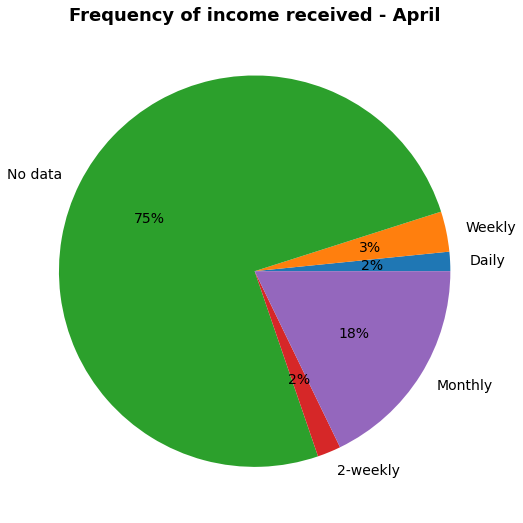

In [47]:
# plotting income type recorded
recorded = ['Daily','Weekly','No data','2-weekly','Monthly']
data = [23,48, 1087, 28, 257]

plt.rcParams['font.size'] = 14

fig = plt.figure(figsize =(12, 9))
plt.pie(data, labels = recorded, autopct='%.0f%%')
plt.title('Frequency of income received - April', fontsize=18, fontweight='bold')

plt.show()

In [48]:
# No income at all - 758 or 27% or records

# Step: Keep rows where ((((((apr_day_pay is missing) and (apr_wk_pay is missing)) and (apr_wk_pay_brac is missing)) and (apr_2wk_pay is missing)) and (apr_2wk_pay_brac is missing)) and (apr_mnth_pay is missing)) and (apr_mnth_pay_brac is missing)
df_wave1_missing = df_wave11.loc[((((((df_wave11['apr_day_pay'].isna()) & (df_wave11['apr_wk_pay'].isna())) & (df_wave11['apr_wk_pay_brac'].isna())) & (df_wave11['apr_2wk_pay'].isna())) & (df_wave11['apr_2wk_pay_brac'].isna())) & (df_wave11['apr_mnth_pay'].isna())) & (df_wave11['apr_mnth_pay_brac'].isna())]


#### Income frequency June ####

* Daily: 21
* Weekly: 51
* 2-Weekly: 28
* Monthly: 297
* Missing: 1056

In [49]:
# Step: Keep rows where ((((((june_daily_pay is missing) and (june_week_pay is missing)) and (june_week_pay_brac is missing)) and (june_2wk_pay is missing)) and (june_2wk_pay_brac is missing)) and (june_mnth_pay is missing)) and (june_mnth_pay_brac is missing)
june_miss = merge3.loc[((((((merge3['june_daily_pay'].isna()) & (merge3['june_week_pay'].isna())) & (merge3['june_week_pay_brac'].isna())) & (merge3['june_2wk_pay'].isna())) & (merge3['june_2wk_pay_brac'].isna())) & (merge3['june_mnth_pay'].isna())) & (merge3['june_mnth_pay_brac'].isna())]


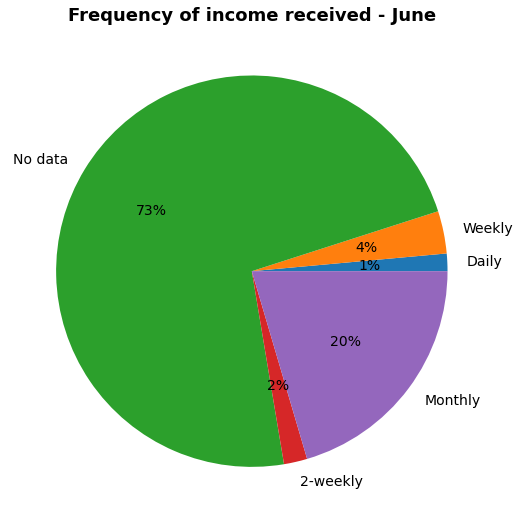

In [50]:
# plotting income type recorded
recorded = ['Daily','Weekly','No data','2-weekly','Monthly']
data = [21,51, 1056, 28, 297]

plt.rcParams['font.size'] = 14

fig = plt.figure(figsize =(12, 9))
plt.pie(data, labels = recorded, autopct='%.0f%%')
plt.title('Frequency of income received - June', fontsize=18, fontweight='bold')

plt.show()

#### Income frequency October ####

* Daily: 41
* Weekly: 65
* 2-weekly: 49
* Monthly: 342
* Missing: 956

In [51]:
# Step: Keep rows where ((((((oct_daily_pay is missing) and (oct_wk_pay is missing)) and (oct_wk_pay_brac is missing)) and (oct_2wks_pay is missing)) and (oct_2wks_pay_brac is missing)) and (oct_mth_pay is missing)) and (oct_mnth_pay_brac is missing)
oct_missing = merge3.loc[((((((merge3['oct_daily_pay'].isna()) & (merge3['oct_wk_pay'].isna())) & (merge3['oct_wk_pay_brac'].isna())) & (merge3['oct_2wks_pay'].isna())) & (merge3['oct_2wks_pay_brac'].isna())) & (merge3['oct_mth_pay'].isna())) & (merge3['oct_mnth_pay_brac'].isna())]


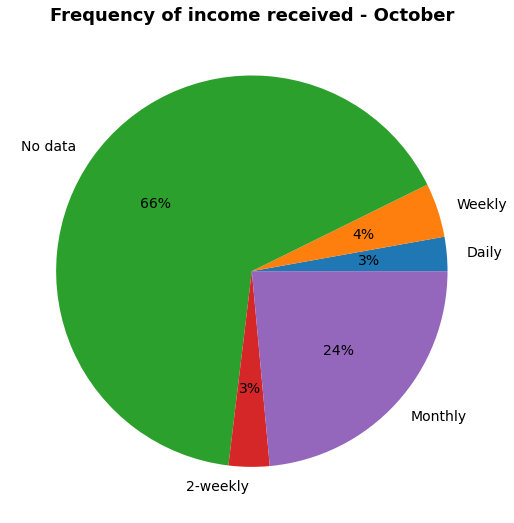

In [52]:
# plotting income type recorded
recorded = ['Daily','Weekly','No data','2-weekly','Monthly']
data = [41,65, 956, 49, 342]

plt.rcParams['font.size'] = 14

fig = plt.figure(figsize =(12, 9))
plt.pie(data, labels = recorded, autopct='%.0f%%')
plt.title('Frequency of income received - October', fontsize=18, fontweight='bold')

plt.show()

#### Income frequency January ####

* Daily: 28
* Weekly: 67
* 2-Weekly: 42
* Monthly: 373
* Missing: 943

In [53]:
# Step: Keep rows where ((((((jan_mnth_pay_brac is missing) and (jan_mth_pay is missing)) and (jan_2wk_pay_brac is missing)) and (jan_2wk_pay is missing)) and (jan_wk_pay_brac is missing)) and (jan_wk_pay is missing)) and (jan_daily_pay is missing)
jan_miss = merge3.loc[((((((merge3['jan_mnth_pay_brac'].isna()) & (merge3['jan_mth_pay'].isna())) & (merge3['jan_2wk_pay_brac'].isna())) & (merge3['jan_2wk_pay'].isna())) & (merge3['jan_wk_pay_brac'].isna())) & (merge3['jan_wk_pay'].isna())) & (merge3['jan_daily_pay'].isna())]


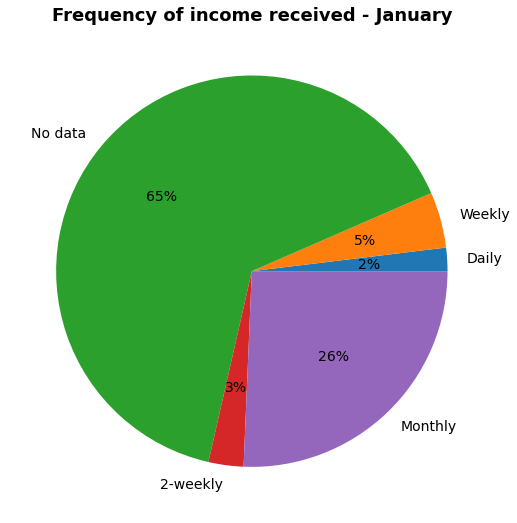

In [54]:
# plotting income type recorded
recorded = ['Daily','Weekly','No data','2-weekly','Monthly']
data = [28, 67, 943, 42, 373]

plt.rcParams['font.size'] = 14

fig = plt.figure(figsize =(12, 9))
plt.pie(data, labels = recorded, autopct='%.0f%%')
plt.title('Frequency of income received - January', fontsize=18, fontweight='bold')

plt.show()

#### Distribution of monthly pay in April ####

In [55]:
# Step: Drop missing values in ['apr_mnth_pay']
apr_pay_clear = df_wave11.dropna(subset=['apr_mnth_pay'])

apr_pay_clear

,pid,age,feb_m_pay,feb_m_pay_brac,apr_day_pay,apr_wk_pay,apr_wk_pay_brac,apr_2wk_pay,apr_2wk_pay_brac,apr_mnth_pay,apr_mnth_pay_brac
39,301268,30,5500,NaN,<NA>,<NA>,NaN,<NA>,NaN,5500,NaN
53,301346,32,6500,NaN,<NA>,<NA>,NaN,<NA>,NaN,6500,NaN
70,301445,31,7000,NaN,<NA>,<NA>,NaN,<NA>,NaN,7000,NaN
88,301488,33,2000,NaN,<NA>,<NA>,NaN,<NA>,NaN,4350,NaN
93,301523,32,4900,NaN,<NA>,<NA>,NaN,<NA>,NaN,4800,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7018,795726,30,24000,NaN,<NA>,<NA>,NaN,<NA>,NaN,12000,NaN
7021,796050,27,1500,NaN,<NA>,<NA>,NaN,<NA>,NaN,2800,NaN
7026,796387,32,<NA>,"<R3,000",<NA>,<NA>,NaN,<NA>,NaN,700,NaN
7037,797196,32,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,4000,NaN


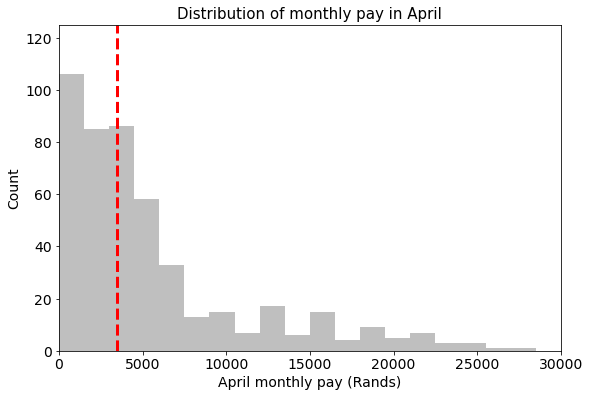

In [56]:
plt.figure(figsize=(9,6))
plt.hist(data=apr_pay_clear, x='apr_mnth_pay', bins=50, alpha=0.5, label="february pay", color='grey')
plt.xlim(0,30000)
plt.ylim(0,125)
plt.xlabel('April monthly pay (Rands)')
plt.ylabel('Count')
plt.title('Distribution of monthly pay in April', fontsize=15)
plt.axvline(3500, color = 'r', linestyle = 'dashed', linewidth = 3, label='median R3,600'); #plotting the median at 3600

Q2: What was the distribution of pay types for each period?

### Mean and median income across the waves ###

#### Monthly income ####

* February monthly income: mean = 3908, median = 2500
* April monthly income: mean = 5242, median = 3500
* June monthly income: mean = 5165, median = 3500
* October monthly income: mean = 5394, median = 3500
* Janaury monthly income: mean = 5317, median = 3500

In [57]:
merge3

,pid,age_x,feb_m_pay,feb_m_pay_brac,apr_day_pay,apr_wk_pay,apr_wk_pay_brac,apr_2wk_pay,apr_2wk_pay_brac,apr_mnth_pay,...,oct_2wks_pay_brac,oct_mth_pay,oct_mnth_pay_brac,jan_daily_pay,jan_wk_pay,jan_wk_pay_brac,jan_2wk_pay,jan_2wk_pay_brac,jan_mth_pay,jan_mnth_pay_brac
0,301082,31,8000,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,...,NaN,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
1,301113,28,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,...,NaN,<NA>,NaN,<NA>,1100,NaN,<NA>,NaN,<NA>,NaN
2,301270,33,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,...,NaN,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
3,301390,32,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,...,NaN,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
4,301418,29,3500,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,...,NaN,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,796387,32,<NA>,"<R3,000",<NA>,<NA>,NaN,<NA>,NaN,700,...,<NA>,700,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,0,<NA>
1449,796609,31,700,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,...,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,0,<NA>
1450,797590,32,3500,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,...,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1451,798473,31,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,...,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


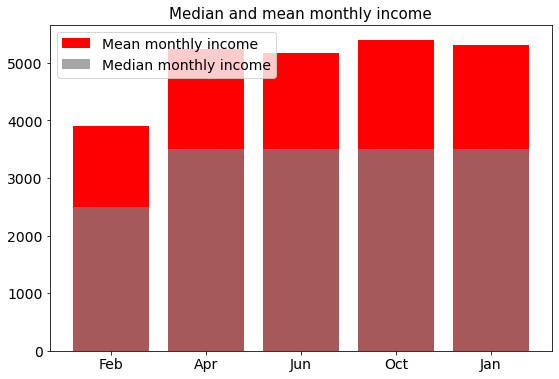

In [58]:
plt.figure(figsize=(9,6))

labels = ['Feb','Apr','Jun','Oct','Jan']
mean_mnth =[3908,5242,5165,5394,5317]
median_mnth=[2500,3500,3500,3500,3500]

plt.bar(labels, mean_mnth, color='red',label='Mean monthly income')
plt.bar(labels, median_mnth, color='grey', label = 'Median monthly income', alpha=0.7)
plt.title('Median and mean monthly income', fontsize=15)
plt.legend();

#### Daily income ####

* April daily pay: mean = 667, median = 200
* June daily pay: mean = 326, median = 200
* October daily pay: mean = 601, median = 350
* January daily pay: mean = 517, median = 200

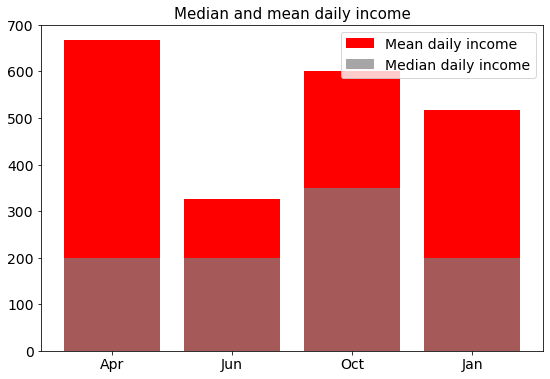

In [59]:
plt.figure(figsize=(9,6))

labels = ['Apr','Jun','Oct','Jan']
mean_mnth =[667,326,601,517]
median_mnth=[200,200,350,200]

plt.bar(labels, mean_mnth, color='red',label='Mean daily income')
plt.bar(labels, median_mnth, color='grey', label = 'Median daily income', alpha=0.7)
plt.title('Median and mean daily income', fontsize=15)
plt.legend();

#### Weekly income ####

* April weekly income - mean = 1910 median = 850
* June weekly income - mean = 1180 median = 830
* Oct weekly income - mean = 1140 median = 900
* Jan weekly income - mean = 1125 median = 830

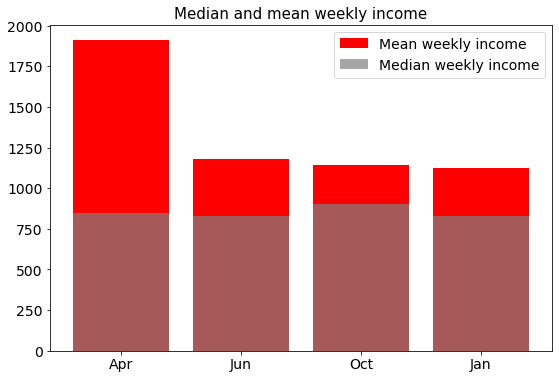

In [60]:
plt.figure(figsize=(9,6))

labels = ['Apr','Jun','Oct','Jan']
mean_mnth =[1910,1180,1140,1125]
median_mnth=[850,830,900,830]

plt.bar(labels, mean_mnth, color='red',label='Mean weekly income')
plt.bar(labels, median_mnth, color='grey', label = 'Median weekly income', alpha=0.7)
plt.title('Median and mean weekly income', fontsize=15)
plt.legend();

#### 2-weekly income ####

* April: mean = 2758, median = 2350
* June: mean = 2217, median = 1600
* October: mean = 1718, median = 1400
* Jan: mean = 2591, median = 1850

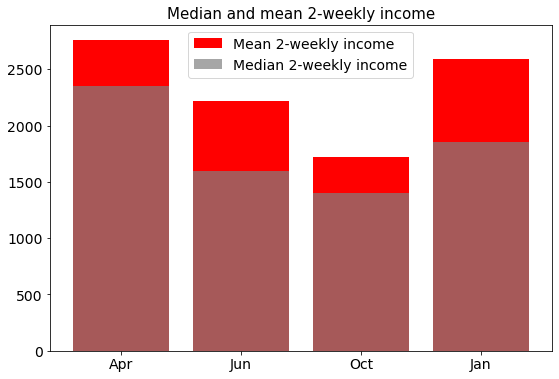

In [61]:
plt.figure(figsize=(9,6))

labels = ['Apr','Jun','Oct','Jan']
mean_mnth =[2758,2217,1718,2591]
median_mnth=[2350,1600,1400,1850]

plt.bar(labels, mean_mnth, color='red',label='Mean 2-weekly income')
plt.bar(labels, median_mnth, color='grey', label = 'Median 2-weekly income', alpha=0.7)
plt.title('Median and mean 2-weekly income', fontsize=15)
plt.legend();

In [62]:
merge3

,pid,age_x,feb_m_pay,feb_m_pay_brac,apr_day_pay,apr_wk_pay,apr_wk_pay_brac,apr_2wk_pay,apr_2wk_pay_brac,apr_mnth_pay,...,oct_2wks_pay_brac,oct_mth_pay,oct_mnth_pay_brac,jan_daily_pay,jan_wk_pay,jan_wk_pay_brac,jan_2wk_pay,jan_2wk_pay_brac,jan_mth_pay,jan_mnth_pay_brac
0,301082,31,8000,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,...,NaN,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
1,301113,28,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,...,NaN,<NA>,NaN,<NA>,1100,NaN,<NA>,NaN,<NA>,NaN
2,301270,33,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,...,NaN,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
3,301390,32,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,...,NaN,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
4,301418,29,3500,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,...,NaN,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,796387,32,<NA>,"<R3,000",<NA>,<NA>,NaN,<NA>,NaN,700,...,<NA>,700,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,0,<NA>
1449,796609,31,700,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,...,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,0,<NA>
1450,797590,32,3500,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,...,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1451,798473,31,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,<NA>,...,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


Q: number of sets for daily, weekly, bi-weekly, monthly through

Q: change in proportions of daily, weekly, bi-weekly, monthly through

Q: how many of original monthly/weekly/bi-weekly/daily are in waves 2, 3, 4?

### Net monthly income gain - April 2020 to January 2021 ###

In [63]:
# Step: Create new column net_month from formula 'jan_mth_pay - apr_mnth_pay'
merge3["net_month"] = merge3['jan_mth_pay'] - merge3['apr_mnth_pay']

# Step: Create new column net_daily from formula 'jan_daily_pay - apr_day_pay'
merge3["net_daily"] = merge3['jan_daily_pay'] - merge3['apr_day_pay']

# Step: Create new column net_weekly from formula 'jan_wk_pay - apr_wk_pay'
merge3["net_weekly"] = merge3['jan_wk_pay'] - merge3['apr_wk_pay']

# Step: Create new column net_2weekly from formula 'jan_2wk_pay - apr_2wk_pay'
merge3["net_2weekly"] = merge3['jan_2wk_pay'] - merge3['apr_2wk_pay']

# Step: Drop missing values in ['net_month']
net_month = merge3.dropna(subset=['net_month'])


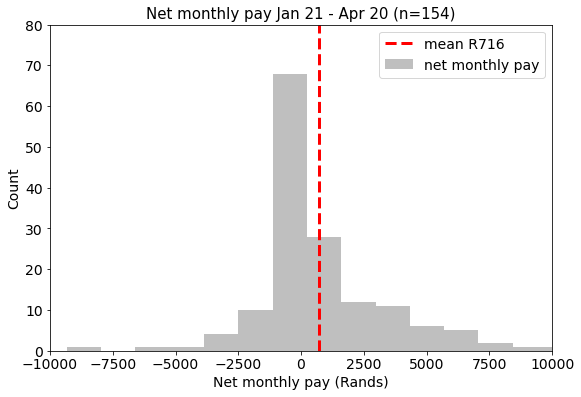

In [64]:
plt.figure(figsize=(9,6))
plt.hist(data=net_month, x='net_month', bins=30, alpha=0.5, label="net monthly pay", color='grey')
plt.xlim(-10000,10000)
plt.ylim(0,80)
plt.xlabel('Net monthly pay (Rands)')
plt.ylabel('Count')
plt.title('Net monthly pay Jan 21 - Apr 20 (n=154)', fontsize=15)
plt.axvline(716, color = 'r', linestyle = 'dashed', linewidth = 3, label='mean R716')
plt.legend();

In [ ]:
# Looking at apr/june figures

In [65]:
# Step: Select columns
net_month1 = net_month[['pid', 'apr_mnth_pay', 'jan_mth_pay', 'net_month']]

# Step: Sort column(s) apr_mnth_pay ascending (A-Z)
net_month1 = net_month1.sort_values(by=['apr_mnth_pay'], ascending=[True])

net_month1

,pid,age_x,feb_m_pay,feb_m_pay_brac,apr_day_pay,apr_wk_pay,apr_wk_pay_brac,apr_2wk_pay,apr_2wk_pay_brac,apr_mnth_pay,...,jan_wk_pay,jan_wk_pay_brac,jan_2wk_pay,jan_2wk_pay_brac,jan_mth_pay,jan_mnth_pay_brac,net_month,net_daily,net_weekly,net_2weekly
6,301445,31,7000,NaN,<NA>,<NA>,NaN,<NA>,NaN,7000,...,<NA>,NaN,<NA>,NaN,7000,NaN,0,<NA>,<NA>,<NA>
12,301523,32,4900,NaN,<NA>,<NA>,NaN,<NA>,NaN,4800,...,<NA>,NaN,<NA>,NaN,2600,NaN,-2200,<NA>,<NA>,<NA>
20,302011,28,3400,NaN,<NA>,<NA>,NaN,<NA>,NaN,0,...,<NA>,NaN,<NA>,NaN,3500,NaN,3500,<NA>,<NA>,<NA>
23,302034,32,<NA>,NaN,<NA>,<NA>,NaN,<NA>,NaN,11000,...,<NA>,NaN,<NA>,NaN,12000,NaN,1000,<NA>,<NA>,<NA>
33,302489,32,3200,NaN,<NA>,<NA>,NaN,<NA>,NaN,3200,...,<NA>,NaN,<NA>,NaN,3100,NaN,-100,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,771069,34,9000,NaN,<NA>,<NA>,NaN,<NA>,NaN,9000,...,<NA>,NaN,<NA>,NaN,9000,NaN,0,<NA>,<NA>,<NA>
1377,771175,26,15000,NaN,<NA>,<NA>,NaN,<NA>,NaN,16000,...,<NA>,NaN,<NA>,NaN,18000,NaN,2000,<NA>,<NA>,<NA>
1378,772368,28,7000,NaN,<NA>,<NA>,NaN,<NA>,NaN,7000,...,<NA>,NaN,<NA>,NaN,6000,NaN,-1000,<NA>,<NA>,<NA>
1447,796050,27,1500,NaN,<NA>,<NA>,NaN,<NA>,NaN,2800,...,<NA>,NaN,<NA>,NaN,0,NaN,-2800,<NA>,<NA>,<NA>
